In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import utils

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.isnull().sum()

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


## 1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [21]:
q1_t = df.Temperature.quantile(.25)
q3_t = df.Temperature.quantile(.75)
iqr_t = q3_t - q1_t

upper_bound_t = q3_t + (1.5 * iqr_t)
lower_bound_t = q1_t - (1.5 * iqr_t)

lower_df_t = df[df.Temperature <= lower_bound_t]
upper_df_t = df[df.Temperature >= upper_bound_t]

print(f'For Temperature Q1 is {q1_t}, Q3 is {q3_t}, and the IQR is {iqr_t}')
print(f'The lower bound of Temperature with a 1.5 multiplier is {lower_bound_t}')
print(f'The upper bound of Temperature with a 1.5 multiplier is {upper_bound_t}')

For Temperature Q1 is 49.7, Q3 is 71.7, and the IQR is 22.0
The lower bound of Temperature with a 1.5 multiplier is 16.700000000000003
The upper bound of Temperature with a 1.5 multiplier is 104.7


In [22]:
lower_df_t

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [23]:
upper_df_t

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


### Temperature results
- Keep the lower bound outlier and drop the upper, 212.0 degrees is pretty impossible on earth at the moment

In [25]:
q1_r = df.Rainfall.quantile(.25)
q3_r = df.Rainfall.quantile(.75)
iqr_r = q3_r - q1_r

upper_bound_r = q3_r + (1.5 * iqr_r)
lower_bound_r = q1_r - (1.5 * iqr_r)

lower_df_r = df[df.Rainfall <= lower_bound_r]
upper_df_r = df[df.Rainfall >= upper_bound_r]

print(f'For Temperature Q1 is {q1_r}, Q3 is {q3_r}, and the IQR is {iqr_r}')
print(f'The lower bound of Rainfall with a 1.5 multiplier is {lower_bound_r}')
print(f'The upper bound of Rainfall with a 1.5 multiplier is {upper_bound_r}')

For Temperature Q1 is 0.65, Q3 is 0.91, and the IQR is 0.26
The lower bound of Rainfall with a 1.5 multiplier is 0.26
The upper bound of Rainfall with a 1.5 multiplier is 1.3


In [26]:
lower_df_r

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [27]:
upper_df_r

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


### Rainfall
- Don't drop anything is seems that Dec thru Jan is the rainy season in this location

In [35]:
q1_f = df.Flyers.quantile(.25)
q3_f = df.Flyers.quantile(.75)
iqr_f = q3_f - q1_f

upper_bound_f = q3_f + (1.5 * iqr_f)
lower_bound_f = q1_f - (1.5 * iqr_f)

lower_df_f = df[df.Flyers <= lower_bound_f]
upper_df_f = df[df.Flyers >= upper_bound_f]

print(f'For Temperature Q1 is {q1_f}, Q3 is {q3_f}, and the IQR is {iqr_f}')
print(f'The lower bound of Flyers with a 1.5 multiplier is {lower_bound_f}')
print(f'The upper bound of Flyers with a 1.5 multiplier is {upper_bound_f}')

For Temperature Q1 is 31.0, Q3 is 49.0, and the IQR is 18.0
The lower bound of Flyers with a 1.5 multiplier is 4.0
The upper bound of Flyers with a 1.5 multiplier is 76.0


In [38]:
lower_df_f

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [39]:
upper_df_f

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41


### Flyers
- Drop lower Keep upper

In [41]:
q1_s = df.Sales.quantile(.25)
q3_s = df.Sales.quantile(.75)
iqr_s = q3_s - q1_s

upper_bound_s = q3_s + (1.5 * iqr_s)
lower_bound_s = q1_s - (1.5 * iqr_s)

lower_df_s = df[df.Sales <= lower_bound_s]
upper_df_s = df[df.Sales >= upper_bound_s]

print(f'For Temperature Q1 is {q1_s}, Q3 is {q3_s}, and the IQR is {iqr_s}')
print(f'The lower bound of Sales with a 1.5 multiplier is {lower_bound_s}')
print(f'The upper bound of Sales with a 1.5 multiplier is {upper_bound_s}')

For Temperature Q1 is 20.0, Q3 is 30.0, and the IQR is 10.0
The lower bound of Sales with a 1.5 multiplier is 5.0
The upper bound of Sales with a 1.5 multiplier is 45.0


In [42]:
lower_df_s

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [43]:
upper_df_s

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


### Sales
- Keep all, 534 sales for 4th of July, not unheard of

# Multiplier 3

In [56]:
q1_t_3 = df.Temperature.quantile(.25)
q3_t_3 = df.Temperature.quantile(.75)
iqr_t_3 = q3_t_3 - q1_t_3

upper_bound_t_3 = q3_t_3 + (3 * iqr_t_3)
lower_bound_t_3 = q1_t_3 - (3 * iqr_t_3)

lower_df_t_3 = df[df.Temperature <= lower_bound_t_3]
upper_df_t_3 = df[df.Temperature >= upper_bound_t_3]

print(f'For Temperature Q1 is {q1_t_3}, Q3 is {q3_t_3}, and the IQR is {iqr_t_3}')
print(f'The lower bound of Temperature with a 3 multiplier is {lower_bound_t_3}')
print(f'The upper bound of Temperature with a 3 multiplier is {upper_bound_t_3}')

For Temperature Q1 is 49.7, Q3 is 71.7, and the IQR is 22.0
The lower bound of Temperature with a 3 multiplier is -16.299999999999997
The upper bound of Temperature with a 3 multiplier is 137.7


In [57]:
lower_df_t

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [58]:
upper_df_t

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


### Temperature results
- Keep the lower bound outlier and drop the upper, 212.0 degrees is pretty impossible on earth at the moment

In [59]:
q1_r_3 = df.Rainfall.quantile(.25)
q3_r_3 = df.Rainfall.quantile(.75)
iqr_r_3 = q3_r_3 - q1_r_3

upper_bound_r_3 = q3_r_3 + (3 * iqr_r_3)
lower_bound_r_3 = q1_r_3 - (3 * iqr_r_3)

lower_df_r_3 = df[df.Rainfall <= lower_bound_r_3]
upper_df_r_3 = df[df.Rainfall >= upper_bound_r_3]

print(f'For Temperature Q1 is {q1_r_3}, Q3 is {q3_r_3}, and the IQR is {iqr_r_3}')
print(f'The lower bound of Rainfall with a 3 multiplier is {lower_bound_r_3}')
print(f'The upper bound of Rainfall with a 3 multiplier is {upper_bound_r_3}')

For Temperature Q1 is 0.65, Q3 is 0.91, and the IQR is 0.26
The lower bound of Rainfall with a 3 multiplier is -0.13
The upper bound of Rainfall with a 3 multiplier is 1.69


In [60]:
lower_df_r

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [61]:
upper_df_r

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


### Rainfall
- Don't drop anything is seems that Dec thru Jan is the rainy season in this location

In [62]:
q1_f_3 = df.Flyers.quantile(.25)
q3_f_3 = df.Flyers.quantile(.75)
iqr_f_3 = q3_f_3 - q1_f_3

upper_bound_f_3 = q3_f_3 + (3 * iqr_f_3)
lower_bound_f_3 = q1_f_3 - (3 * iqr_f_3)

lower_df_f_3 = df[df.Flyers <= lower_bound_f_3]
upper_df_f_3 = df[df.Flyers >= upper_bound_f_3]

print(f'For Temperature Q1 is {q1_f_3}, Q3 is {q3_f_3}, and the IQR is {iqr_f_3}')
print(f'The lower bound of Flyers with a 3 multiplier is {lower_bound_f_3}')
print(f'The upper bound of Flyers with a 3 multiplier is {upper_bound_f_3}')

For Temperature Q1 is 31.0, Q3 is 49.0, and the IQR is 18.0
The lower bound of Flyers with a 3 multiplier is -23.0
The upper bound of Flyers with a 3 multiplier is 103.0


In [63]:
lower_df_f

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [64]:
upper_df_f

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41


### Flyers
- Drop lower Keep upper

In [65]:
q1_s_3 = df.Sales.quantile(.25)
q3_s_3 = df.Sales.quantile(.75)
iqr_s_3 = q3_s_3 - q1_s_3

upper_bound_s_3 = q3_s_3 + (3 * iqr_s_3)
lower_bound_s_3 = q1_s_3 - (3 * iqr_s_3)

lower_df_s_3 = df[df.Sales <= lower_bound_s_3]
upper_df_s_3 = df[df.Sales >= upper_bound_s_3]

print(f'For Temperature Q1 is {q1_s_3}, Q3 is {q3_s_3}, and the IQR is {iqr_s_3}')
print(f'The lower bound of Sales with a 3 multiplier is {lower_bound_s_3}')
print(f'The upper bound of Sales with a 3 multiplier is {upper_bound_s_3}')

For Temperature Q1 is 20.0, Q3 is 30.0, and the IQR is 10.0
The lower bound of Sales with a 3 multiplier is -10.0
The upper bound of Sales with a 3 multiplier is 60.0


In [66]:
lower_df_s

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [67]:
upper_df_s

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

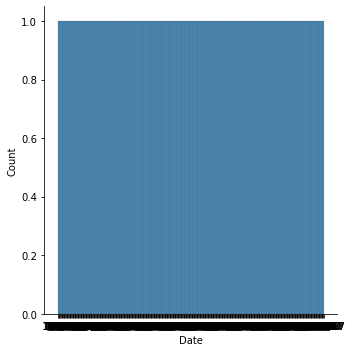

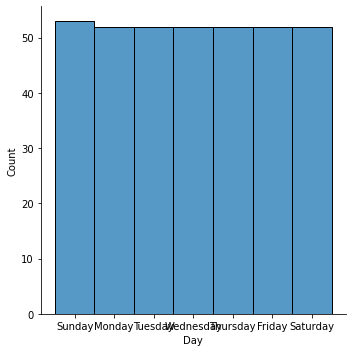

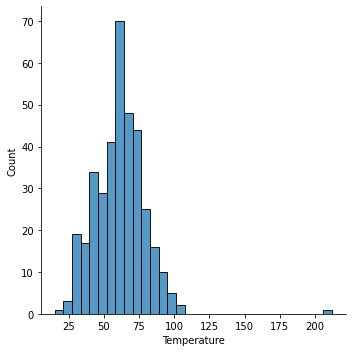

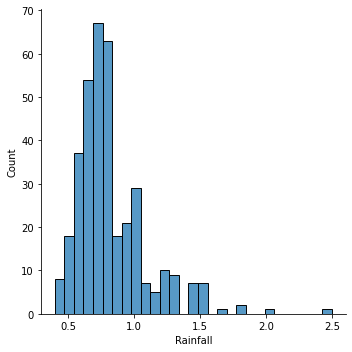

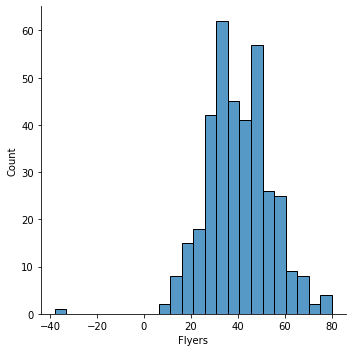

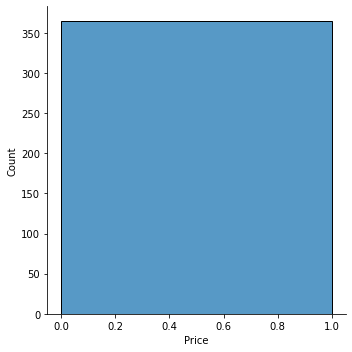

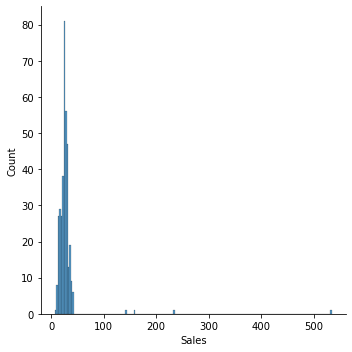

In [69]:
for col in df.columns:
    sns.displot(df[col])